In [63]:
import numpy as np

from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

from ml4comm.qam_awgn import generate_symbols
from ml4comm.qam_analyzer import plot_decision_boundary, ser, plot_confusion_matrix
from ml4comm.plot import plot_symbols
from ml4comm.symbols import setup_channel, generate_dataset

%load_ext autoreload
%autoreload 2
%matplotlib inline

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [64]:
channel_type = 'awgn' # 'awgn' or 'crazy'
M            = 16      # QAM modulation
num_symbols  = 1500    # Number of transmitted symbols
SNR_dB       = 15      # Signal to noise ratio in dB     
code_rate    = 1       # Rate of the used code
Es           = 1       # Average symbol energy

NUM_THREADS=-1 # use all available threads
MAX_ERROR_RATE = 0.03 # Max error rate: 3%

# Model Parameters
RF_MAX_DEPTH      = 50
RF_NUM_ESTIMATORS = 50
KNN_NUM_NEIGHBORS = 11

In [65]:
def classification_workflow(model):
  symbs, indexes = generate_symbols(num_symbols, M) # Generate the QAM symbols
  channel_output = setup_channel(channel_type,symbs,code_rate,Es,SNR_dB)
  [X_train, X_test, y_train, y_test] = generate_dataset(channel_output,indexes)
  clf = model.fit(X_train, y_train) 
  return ser(clf, X_test, y_test)

def print_accuracy(ser_array: np.ndarray, threshold: float):
  arr = np.where(ser_array <= threshold, 1, 0)
  output = np.sum(arr)/ser_array.size
  print(f'{output:.2%}')
  

In [66]:
symbs, indexes = generate_symbols(num_symbols, M) # Generate the QAM symbols
channel_output = setup_channel(channel_type,symbs,code_rate,Es,SNR_dB)
[X_train, X_test, y_train, y_test] = generate_dataset(channel_output,indexes)

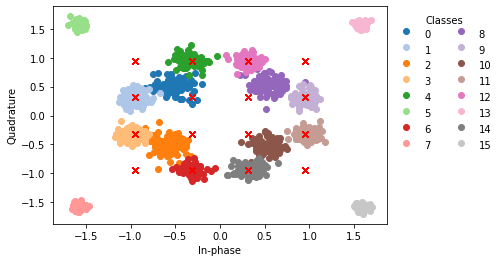

In [67]:
plot_symbols(X_train, y_train, symbs, QAM_modulation=M)

## Classifiers

### Random Forest

60.61%


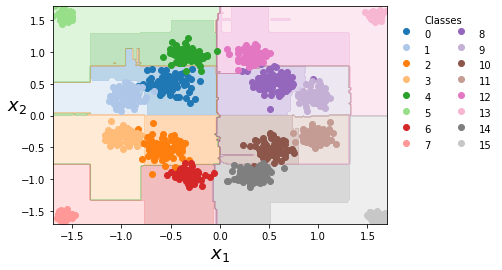

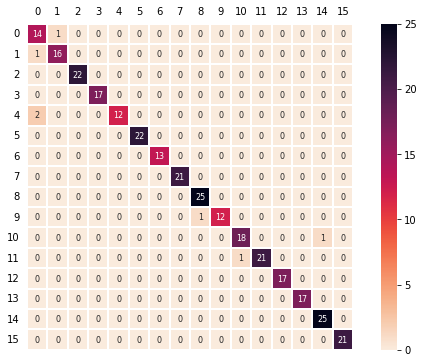

In [68]:
clf_RF = RandomForestClassifier(max_depth=RF_MAX_DEPTH, n_estimators=RF_NUM_ESTIMATORS, n_jobs=NUM_THREADS)
sers = [classification_workflow(clf_RF) for x in range(33)]
sers = np.array(sers)
print_accuracy(sers, MAX_ERROR_RATE)
plot_decision_boundary(clf_RF, X_train, y_train, legend=True)
plot_confusion_matrix(clf_RF, X_test, y_test, M)

### K-nearest neighbors

93.94%


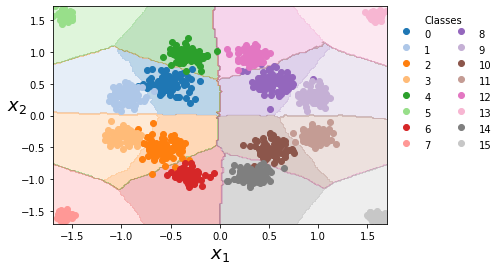

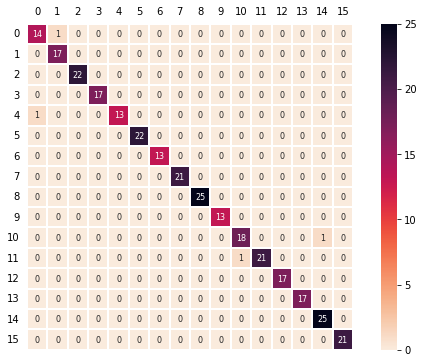

In [69]:
clf_KNN = KNeighborsClassifier(KNN_NUM_NEIGHBORS, n_jobs=NUM_THREADS)
sers = [classification_workflow(clf_KNN) for x in range(33)]
sers = np.array(sers)
print_accuracy(sers, MAX_ERROR_RATE)
plot_decision_boundary(clf_KNN, X_train, y_train, legend=True)
plot_confusion_matrix(clf_KNN, X_test, y_test, M)